17 June 2020

# Investigate New York city High School data

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

- [New York City](https://en.wikipedia.org/wiki/New_York_City)
- [The SAT](https://en.wikipedia.org/wiki/SAT)
- [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
- [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made up of five boroughs (*Brooklyn, Queens, Manhattan, the Bronx, and Staten Island*), which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contains dozens of schools.
- Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a `DBN`, or district borough number.
- Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

Once we've done our background research, we're ready to read in the data. We have placed all the data into the *schools* folder. Here are all of the files in the folder:

- `ap_2010.csv` - Data on [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- `class_size.csv` - Data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
- `demographics.csv` - Data on [demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)
- `graduation.csv` - Data on [graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)
- `hs_directory.csv` - A directory of [high schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)
- `sat_results.csv` - Data on [SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)
- `survey_all.txt` - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from all schools
- `survey_d75.txt` - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from New York City [district 75](http://schools.nyc.gov/academics/specialEducation/D75/default.htm)

`survey_all.txt` and `survey_d75.txt` are in more complicated formats than the other files. For now, we'll focus on reading in the CSV files only, and then explore them.

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We'll read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on.

In [2]:
data_files = ['ap_2010.csv', 'class_size.csv', 'demographics.csv',
              'graduation.csv', 'hs_directory.csv', 'sat_results.csv']

data = {}
for csv in data_files:
    path = 'schools/{}'.format(csv)
    df_temp = pd.read_csv(path)
    key = csv.split('.')[0]
    data[key] = df_temp

 Let's explore the datasets to see if we can gain any insight into how to combine them.

In [3]:
# look the first five rows:
data['ap_2010'].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [4]:
# missing values:
data['ap_2010'].isnull().sum()

DBN                                     0
SchoolName                              0
AP Test Takers                          0
Total Exams Taken                       0
Number of Exams with scores 3 4 or 5    0
dtype: int64

In [5]:
# 'CSD' column    : Community School District
# 'BOROUGH' column: Borough
# 'SCHOOL CODE'   : Borough and School Number

# look the first five rows:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [6]:
# missing values:
data['class_size'].isnull().sum()

CSD                                         0
BOROUGH                                     0
SCHOOL CODE                                 0
SCHOOL NAME                                 0
GRADE                                    1484
PROGRAM TYPE                             1484
CORE SUBJECT (MS CORE and 9-12 ONLY)     1484
CORE COURSE (MS CORE and 9-12 ONLY)      1484
SERVICE CATEGORY(K-9* ONLY)              1484
NUMBER OF STUDENTS / SEATS FILLED        1484
NUMBER OF SECTIONS                       1484
AVERAGE CLASS SIZE                       1484
SIZE OF SMALLEST CLASS                   1484
SIZE OF LARGEST CLASS                    1484
DATA SOURCE                              1484
SCHOOLWIDE PUPIL-TEACHER RATIO          26127
dtype: int64

In [7]:
# look the first five rows:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [8]:
# missing values:
data['demographics'].isnull().sum()

DBN                     0
Name                    0
schoolyear              0
fl_percent           1515
frl_percent          5593
total_enrollment        0
prek                 5363
k                    4193
grade1               4194
grade2               4224
grade3               4296
grade4               4334
grade5               4298
grade6               5558
grade7               5872
grade8               5990
grade9               6101
grade10              6229
grade11              6401
grade12              6562
ell_num               190
ell_percent           112
sped_num               90
sped_percent            0
ctt_num              1397
selfcontained_num    1000
asian_num               0
asian_per               0
black_num               0
black_per               0
hispanic_num            0
hispanic_per            0
white_num               0
white_per               0
male_num               41
male_per                0
female_num             24
female_per              0
dtype: int64

In [9]:
# look the first five rows:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [10]:
# missing values:
data['graduation'].isnull().sum()

Demographic                            0
DBN                                    0
School Name                            0
Cohort                                 0
Total Cohort                           0
Total Grads - n                        0
Total Grads - % of cohort              0
Total Regents - n                      0
Total Regents - % of cohort            0
Total Regents - % of grads            45
Advanced Regents - n                   0
Advanced Regents - % of cohort         0
Advanced Regents - % of grads         45
Regents w/o Advanced - n               0
Regents w/o Advanced - % of cohort     0
Regents w/o Advanced - % of grads     45
Local - n                              0
Local - % of cohort                    0
Local - % of grads                    45
Still Enrolled - n                     0
Still Enrolled - % of cohort           0
Dropped Out - n                        0
Dropped Out - % of cohort              0
dtype: int64

In [11]:
# look the first five rows:
data['hs_directory'].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [12]:
# missing values:
data['hs_directory'].isnull().sum()

dbn                                   0
school_name                           0
boro                                  0
building_code                         0
phone_number                          0
fax_number                           12
grade_span_min                        0
grade_span_max                        0
expgrade_span_min                   402
expgrade_span_max                   402
bus                                   1
subway                               77
primary_address_line_1                0
city                                  0
state_code                            0
zip                                   0
website                               5
total_students                        9
campus_name                         218
school_type                         331
overview_paragraph                    1
program_highlights                    1
language_classes                     23
advancedplacement_courses            95
online_ap_courses                   371


In [13]:
# look the first five rows:
data['sat_results']

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


In [14]:
# missing values:
data['sat_results'].isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
SAT Writing Avg. Score             0
dtype: int64

**focus on `sat_results`** <br>
What we're mainly interested in is the SAT data set, which corresponds to the dictionary key `sat_results`. This data set contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this data set with information in the other data sets.

Let's explore `sat_results` to see what we can discover. Exploring the dataframe will help us understand the structure of the data, and make it easier for us to analyze it.

We can make a few observations based on `'sat_results'` dataframe (see above):
- The `DBN` appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each `DBN` is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `SAT Writing Avg. Score` -- into a single column to make the scores easier to analyze.

In [15]:
# Convert the last three columns of 'sat_results' to numeric
# do NOT forget the errors='coerce' --> invalid parsing will be set as NaN.
sat_cols = ['SAT Critical Reading Avg. Score',
            'SAT Math Avg. Score',
            'SAT Writing Avg. Score']
for c in sat_cols:
    data['sat_results'][c] = pd.to_numeric(data['sat_results'][c], errors='coerce')

# Create a column that totals up the SAT scores for the different sections of the exam
data['sat_results']['sat_score'] = ( data['sat_results']['SAT Critical Reading Avg. Score']
                                   + data['sat_results']['SAT Math Avg. Score']
                                   + data['sat_results']['SAT Writing Avg. Score'])

***
### (**Geo... page 13/16 of 'Data Cleaning Walkthrough')

***
We can make some observations based on above dataframes:
- Each dataset appears to either have a `DBN` column, or the information we need to create one. **That means we can use a `DBN` column to combine the datasets**. First we'll pinpoint matching rows from different data sets by looking for identical `DBN`s, then group all of their columns together in a single data set.
- Some fields look interesting for mapping -- particularly `Location 1` (of `hs_directory` dataframe), which contains coordinates inside a larger string.
- Some of the data sets appear to contain multiple rows for each school (because the rows have **duplicate** `DBN` values) - see `class_size`,  `graduation`, `demographics` dataframe. That means we’ll have to do some preprocessing to ensure that each `DBN` is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.
- `hs_directory` does have a `dbn` column, though, so we can just rename it.

### Create `DBN` column in the `class_size` dataframe
We can notice that `class_size` doesn't have a `DBN` column. From looking the rows, we can say that the `DBN` in the `sat_results` data is just a **combination** of the `CSD` (1st column) and `SCHOOL CODE` (3rd column) columns in the `class_size` data. The main difference is that the `DBN` is padded, so that the `CSD` portion of it always consists of **two digits**. That means we'll need to add a leading **0** to the `CSD` if the `CSD` is less than two digits long. See the following example:

| CSD | Padded CSD (we should create it) | SCHOOL CODE | combination |
|---  |---                               | ---         | ---         |
| 1   | 01                               | M015        | 01M015      |
|9    | 09                               | X011        | 09X011      |

In [16]:
# Function for adding a leading 0 whenever the CSD is
# less than two digits (that is, from 1 to 9):
def create_padded_csd(number):
    return str(number).zfill(2)

# Create a new column called padded_csd in the class_size data set.
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(create_padded_csd)

# Use the addition operator (+) along with the 'padded_csd'
# and 'SCHOOL CODE' columns of 'class_size', then assign the result
# to the 'DBN' column of class_size.
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

In [17]:
# Rename the 'dbn' column in 'hs_directory' dataframe to 'DBN'
data['hs_directory'].rename(columns={'dbn': 'DBN'}, inplace=True)

So, each dataset contains `DBN` column.

***
### Survey files
#### read the .txt files

In [18]:
all_survey = pd.read_csv('schools/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('schools/survey_d75.txt', delimiter='\t', encoding='windows-1252')

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the pandas.concat() function:

In [19]:
survey = pd.concat([all_survey, d75_survey], axis=0)

In [20]:
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two immediate facts that we can see in the `survey` data:
- There are over **2000** columns, nearly all of which we don't need. We'll have to **filter** the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
- The survey data has a `dbn` column that we'll want to convert to uppercase (`DBN`). The conversion will make the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8). The `Survey Data Dictionary.xls` tells us what each column represents. We can use the data dictionary to determine which columns to use.

These columns *(see below - 'survey_fields')* will give us aggregate survey data about how parents `p`, teachers `t`, and students `s` feel about school safety, academic performance, and more. It will also give us the `DBN`, which allows us to uniquely identify the school. Also,
- `saf`: Safety and Respect score
  - `saf_p_11`  : Safety and Respect score based on parent responses
  - `saf_t_11`  : Safety and Respect score based on teacher responses
  - `saf_s_11`  : Safety and Respect score based on student responses
  - `saf_tot_11`: Safety and Respect total score
- `com`: Communication score
- `eng`: Engagement score
- `aca`: Academic expectations score

In [21]:
# The survey data has a 'dbn' column that we will want to convert to uppercase 'DBN':
survey.rename(columns={'dbn': 'DBN'}, inplace=True) # 2nd way: survey = survey.rename(columns={'dbn': 'DBN'})

# Based on the 'Survey Data Dictionary.xls', it looks like these are the relevant columns:
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p",
                 "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11",
                 "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", 
                 "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11",
                 "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# Filter 'survey' so it only contains the columns we listed above:
survey = survey.loc[:, survey_fields]

# Assign the dataframe survey to the key survey in the dictionary data:
data['survey'] = survey

***
### Resolve the issue of Duplicate values
`class_size`, `graduation` and `demographics` datasets contain duplicate values based on `DBN` column.

***
#### `class_size` dataframe

In [22]:
data['class_size'].shape

(27611, 18)

In [23]:
# rename the 'GRADE' column of 'class_size' dataframe because it has a space at the end:
data['class_size'].rename(columns={'GRADE ': 'GRADE'}, inplace=True)

In [24]:
# look at the unique values for 'GRADE':
data['class_size']['GRADE'].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Because we are dealing with High Schools, we are only concerned with grades `9` through `12`. That means we only want to pick rows where the value in the `GRADE` column is `09-12`.

In [25]:
# look at the unique values for 'PROGRAM TYPE':
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.

In [26]:
# create a new variable called 'class_size' and assign the values of 'data['class_size']' to it:
class_size = data['class_size']

# Boolean array (= Filter) selecting rows where:
# - 'GRADE' column contains the value '09-12', and
# - 'PROGRAM TYPE' column contains the value 'GEN ED'
class_bool = (class_size['GRADE'] == '09-12') & (class_size['PROGRAM TYPE'] == 'GEN ED')

class_size = class_size[class_bool]

In [27]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


As we saw when we displayed `class_size` on the last screen, `DBN` still isn't completely unique. This is due to the `CORE SUBJECT (MS CORE and 9-12 ONLY)` and `CORE COURSE (MS CORE and 9-12 ONLY)` columns. `CORE SUBJECT (MS CORE and 9-12 ONLY)` and `CORE COURSE (MS CORE and 9-12 ONLY)` seem to pertain to different kinds of classes.

In [28]:
# look at the unique values of 'CORE SUBJECT (MS CORE and 9-12 ONLY)'
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects, such as *'ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'*. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is to take the advantage across all of the classes a school offers. This will give us unique `DBN` values, while also incorporating as much data as possible into the average.

In [29]:
# look at the unique values of 'CORE COURSE (MS CORE and 9-12 ONLY)'
class_size['CORE COURSE (MS CORE and 9-12 ONLY)'].unique()

array(['English 9', 'English 10', 'English 11', 'English 12',
       'Integrated Algebra', 'Geometry', 'Other Math', 'Earth Science',
       'Living Environment', 'Chemistry', 'Physics', 'Other Science',
       'Global History & Geography', 'US History & Government',
       'MS English Core', 'Other English', 'Trigonometry',
       'Participation in Government', 'Math A', 'Economics',
       'Other Social Studies', 'Math B'], dtype=object)

### groupby() based on `DBN`

Fortunately, we can use the `pandas.DataFrame.groupby()` method to help us with this. The `DataFrame.groupby()` method will split a dataframe up into unique groups, based on a given column. We can then use the `agg()` method on the resulting `pandas.core.groupby` object to find the **mean** of each column.

For example, having the following **three** `DBN`s, we can calculate the mean of each `DBN` by using `groupby()` and `agg()` methods.

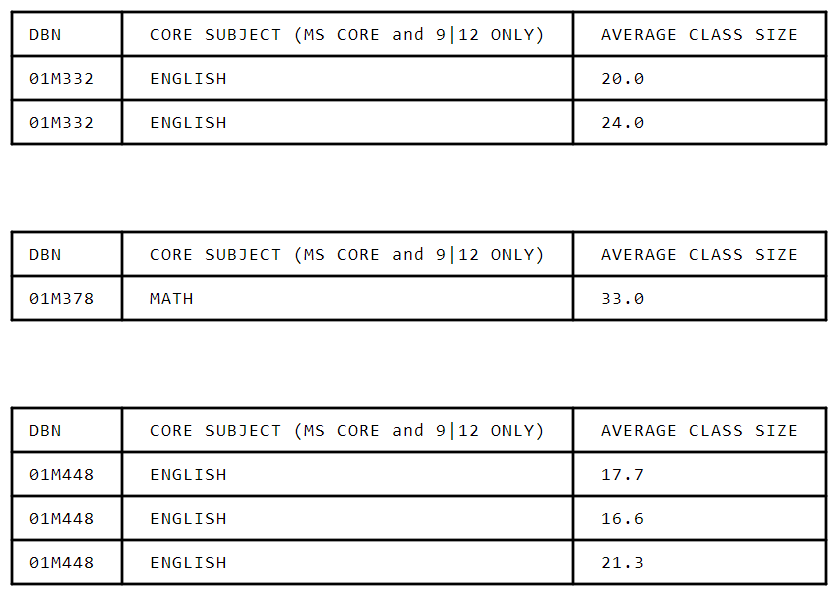

Then, we can compute the averages for the `AVERAGE CLASS SIZE` column in each of the four groups using the `agg()` method:

| DBN    | AVERAGE CLASS SIZE|
|---     | ---               |
| 01M332 | 22.00             |
| 01M378 | 33.00             |
| 01M448 | 18.53             |

In [30]:
# Find the average values for each column associated with each 'DBN' in 'class_size':
class_size = class_size.groupby('DBN').agg(np.mean)

# Reset the index to make 'DBN' a column again - do not forget the inplace parameter to be True:
class_size.reset_index(inplace=True)

# Assign 'class_size' back to 'class_size' key of the 'data' dictionary:
data['class_size'] = class_size

In [31]:
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [32]:
data['class_size'].shape

(583, 8)

So, the rows of `class_size` has decreased from `27611` to `583`.

***
#### `demographics` dataframe

In [33]:
data['demographics'].head(10)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


In this case, the only column that prevents a given `DBN` from being unique is the `schoolyear`. We only want to select rows where the `schoolyear` is `20112012`. This will give us the most recent year of data, and also match our `SAT` results data.

In [34]:
# Boolean array (= Filter) selecting rows where
# 'schoolyear' column is '20112012'
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]

In [35]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


***
#### `graduation` dataframe

In [36]:
data['graduation'].head(8)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%
6,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5%,19,36.5%,57.6%,...,11,21.2%,33.299999999999997%,14,26.9%,42.4%,16,30.8%,1,1.9%
7,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2003,87,67,77%,39,44.8%,58.2%,...,28,32.200000000000003%,41.8%,28,32.200000000000003%,41.8%,9,10.3%,11,12.6%


In [37]:
data['graduation']['Demographic'].unique()

array(['Total Cohort', 'Male', 'English Language Learners',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Asian', 'Black', 'Hispanic',
       'White', 'Female'], dtype=object)

In [38]:
data['graduation']['Cohort'].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

The `Demographic` and `Cohort` columns are what prevent `DBN` from being unique in the `graduation` data. A `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group.

In this case, we want to pick data from the most recent `Cohort` available, which is `2006`. We also want data from the full `Cohort`, so we will only pick rows where `Demographic` is `Total Cohort`.

In [39]:
# Boolean array (= Filter) selecting rows where:
# - 'Demographic' column is 'Total Cohort', and
# - 'Cohort' column is '2006'
grad_bool = (data['graduation']['Demographic'] == 'Total Cohort') & (data['graduation']['Cohort'] == '2006')

data['graduation'] = data['graduation'][grad_bool]

In [40]:
# display the first 5 rows
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


So, we have resolved the issue about the **Duplicate** values.

***
### Convert the values of `ap_2010` from string to numeric

The only remaining thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the `ap_2010` dataset to numeric values first.

In [41]:
# Rename the 'AP Test Takers ' column of 'ap_2010' dataframe because it has a space at the end:
data['ap_2010'].rename(columns={'AP Test Takers ': 'AP Test Takers'}, inplace=True)

# There are three columns that we need to convert:
ap_cols = data['ap_2010'].columns[2:].to_list()

# Convert the 'ap_cols' to numeric:
# do NOT forget the error='coerce'
for c in ap_cols:
    data['ap_2010'][c] = pd.to_numeric(data['ap_2010'][c], errors='coerce')

***
## Combine/Merge datasets

We will be using the `DBN` column to identify matching rows across datasets. We will merge two datasets at a time and continue combining them until we have merged all of them.

Choosing a `merge` strategy is an important decision; it is worth thinking about your data carefully, and what trade-offs you are willing to make. Because we are concerned with determining demographic factors that correlate with SAT score, we will want to preserve as many rows as possible from `sat_results` while minimizing `NaN` values.

This means that a `left` join is more appropriate because we do not want to lose too many rows when we merge.

In [42]:
# assign data['sat_results'] to the variable 'combined'
combined = data['sat_results']

# merge 'ap_2010' dataset into 'combined' - how='left'
combined = combined.merge(data['ap_2010'], on='DBN', how='left')

# merge 'graduation' dataset into 'combined' - how='left'
combined = combined.merge(data['graduation'], on='DBN', how='left')

In [43]:
# Display the first few rows of combined
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


In [44]:
# display the shape of 'combined'
combined.shape

(479, 33)

Now that we have performed the `left` joins, we still have to merge `class_size`, `demographics`, `survey`, and `hs_directory` into `combined`.

Because these files contain information that is more valuable to our analysis, we will use the `inner` join type.

In [45]:
# Merge 'class_size', 'demographics', 'survey', and 'hs_directory' into combined one by one:
to_merge = ['class_size', 'demographics', 'survey', 'hs_directory']

for m in to_merge:
    combined = combined.merge(data[m], on='DBN', how='inner')

In [46]:
# display the shape of 'combined'
combined.shape

(363, 156)

We can see that there has been a decrease in the rows (`363`) and increase in the columns (`156`).

In [47]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137..."
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,For M35B only: Open only to students whose hom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712..."
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72..."
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72..."
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7..."


In [48]:
# quick check of the missing values:
combined.isnull().sum()

DBN                                  0
SCHOOL NAME                          0
Num of SAT Test Takers               0
SAT Critical Reading Avg. Score     28
SAT Math Avg. Score                 28
                                  ... 
priority07                         361
priority08                         363
priority09                         363
priority10                         363
Location 1                           0
Length: 156, dtype: int64

We replace the missing values with the **mean** of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).

In [49]:
# Calculate the means of all of the columns in combined
means = combined.mean()

# Fill in any missing values in combined with the means of the respective columns:
combined = combined.fillna(means)

In [50]:
# quick check of the missing values:
combined.isnull().sum()

DBN                                  0
SCHOOL NAME                          0
Num of SAT Test Takers               0
SAT Critical Reading Avg. Score      0
SAT Math Avg. Score                  0
                                  ... 
priority07                         361
priority08                         363
priority09                         363
priority10                         363
Location 1                           0
Length: 156, dtype: int64

Note that if a column consists entirely of `NaN` values, pandas will not be able to fill in the missing values when we use the `df.fillna()` method along with the `df.mean()` method, because there will not be a mean.

We should fill any `NaN` values that remain after the initial replacement with the value `0` into the `df.fillna()` method.

In [51]:
# Fill in any remaining missing values in combined with 0:
combined = combined.fillna(0)

In [52]:
# quick check of the missing values:
combined.isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
priority07                         0
priority08                         0
priority09                         0
priority10                         0
Location 1                         0
Length: 156, dtype: int64

***
We have finished cleaning and combining our data. We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district (`school_dist`) is just the first two characters of the `DBN`. We can apply a function over the `DBN` column of `combined` that pulls out the first two letters.

In [53]:
# Write a function that extracts the first two characters of a string and returns them
def get_first_two_chars(dbn):
    return dbn[:2]

# Apply the function to the 'DBN' column of 'combined' and assign
# the result to the 'school_dist' column
combined['school_dist'] = combined['DBN'].apply(get_first_two_chars)

In [54]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0.0,0.0,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0.0,0.0,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0.0,0.0,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",01


***
We now have a clean dataset we can analyse. That is, in order to investigate possible relationships between `SAT scores` and `demographics`, we acquired several datasets containing information about *New York City public school*. We cleaned them, then combined them into a single dataset named `combined` that we are now ready to analyse and visualise.

The first thing we will do is to find any correlations between any of the columns and `sat_scope`. This will help us determine which columns might be interesting to plot out or investigate further.

#### Correlations
Correlations tell us how closely related two columns are. We'll be using the `r value`, also called **Pearson's correlation coefficient**, which measures how closely two sequences of numbers are correlated.

An `r value` falls between -1 and 1. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation.

#### In general, `r values` above `.25` or below `-.25` are enough to qualify a correlation as interesting.
An `r value` isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one. To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape".

In [55]:
# Find all possible correlations:
correlations = combined.corr()

# Filter 'correlations' so that it only shows correlations for the 'sat_score' column:
correlations = correlations['sat_score']

### `r values` above `.25`

In [56]:
# print the rows which have r values above 0.25:
r_values_above_025 = [idx for idx in correlations.index if correlations[idx] >= 0.25]
correlations[r_values_above_025].sort_values(ascending=False)

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
white_per                               0.620718
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num                              0.388631
AVERAGE CLASS SIZE                      0.381014
total_enrollment                        0.367857
NUMBER OF SECTIONS                      0.362673
aca_s_11                                0.339435
saf_s_11            

Unsurprisingly, `SAT Writing Avg. Score`, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `sat_score` are strongly correlated with `sat_score`.

We can also make some other observations:
- `total_enrollment` has a strong positive correlation with `sat_score`. This is surprising because we would expect smaller schools where students receive more attention to have higher scores. Other columns that are proxies for enrollment correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken` and `NUMBER OF SECTIONS`.
- Teacher and student ratings of school safety (`saf_t_11`) and (`saf_s_11`) correlate with `sat_score`.
- Students ratings of school academic standards (`aca_s_11`) correlate with `sat_score`, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).

You may have noticed that `saf_t_11` and `saf_s_11`, which measure how teachers and students perceive safety at school, correlated highly with `sat_score`. This make sense, as it's hard to teach or learn in an unsafe environment. We will dig into this relationship a bit more, and try to figure out which schools have low safety scores.

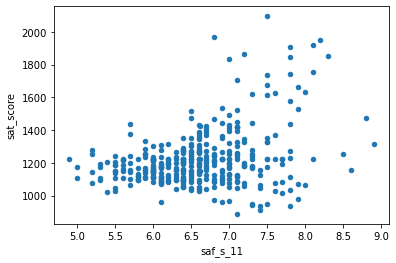

In [57]:
# make a scatter plot of the 'saf_s_11' column vs. the 'sat_score' in 'combined'
combined.plot.scatter(x='saf_s_11', y='sat_score')

There appears to be a correlation between SAT scores (`sat_score`) and safety (`saf_s_11`), although it is not that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower that 6.5 has an average SAT score higher than 1500 and so.

### Map out Safety Scores

In [58]:
# Safety and Respect score columns:
saf = [c for c in combined.columns if 'saf' in c]
saf

['saf_p_11', 'saf_t_11', 'saf_s_11', 'saf_tot_11']

In [59]:
# Counts of unique values for 'school_dist' column:
combined['school_dist'].value_counts()

02    48
10    22
09    20
11    15
17    14
14    14
07    13
13    13
24    13
12    12
19    12
03    12
08    11
18    11
28    11
21    11
31    10
06    10
27    10
15     9
30     9
25     8
29     8
04     7
05     7
01     6
32     6
20     5
26     5
22     4
16     4
23     3
Name: school_dist, dtype: int64

In [60]:
districts = combined.groupby('school_dist').agg(np.mean)
districts[saf]

,saf_p_11,saf_t_11,saf_s_11,saf_tot_11
school_dist,,,,
01,8.233333,7.066667,6.768611,7.433333
02,8.254167,7.404167,6.910660,7.520833
03,8.316667,6.675000,6.716667,7.233333
04,8.385714,7.871429,6.885714,7.714286
05,8.085714,6.857143,6.314286,7.085714
06,8.530000,7.490000,6.950000,7.660000
07,8.423077,6.969231,6.800000,7.392308
08,8.172727,7.109091,6.364697,7.218182
09,8.510000,6.935000,6.655000,7.365000


***
### `r values` below `-.25`

In [61]:
# print the rows which have r values below -0.25:
r_values_below_minus025 = [idx for idx in correlations.index if correlations[idx] <= -0.25]
correlations[r_values_below_minus025].sort_values()

frl_percent    -0.722225
sped_percent   -0.448170
ell_percent    -0.398750
hispanic_per   -0.396985
black_per      -0.284139
Name: sat_score, dtype: float64

We can see that:
- There is significant racial inequality in SAT score (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
- The percentage of English language learners at the school (`ell_percent`, `frl_percent`) has a strong negative correlations with SAT scores.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of `total_enrollment` vs `sat_score`. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

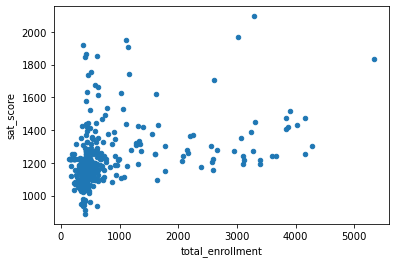

In [62]:
# Create a scatterplot of 'total_enrollment' versus 'sat_score'.
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between `sat_score` and `total_enrollment`. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where `total_enrollment` and `sat_score` are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

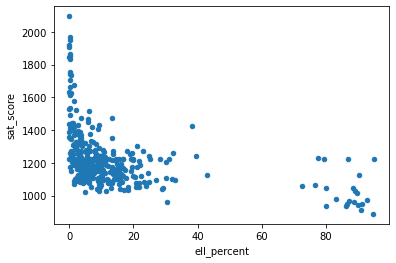

In [63]:
# Create a scatterplot of 'ell_percent' versus 'sat_score'.
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

It looks like `ell_percent` correlates with `sat_score` more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high `ell_percent` values and low `sat_score` values. 

***

## Racial differences in SAT scores

There are a few columns that indicate the percentage of each race at a given school:
- `white_per`
- `asian_per`
- `black_per`
- `hispanic_per`

By plotting out the correlation between these columns and `sat_score`, we can determine whether there are any racial difference in SAT performance.

#### Investigate racial differences in SAT scores.

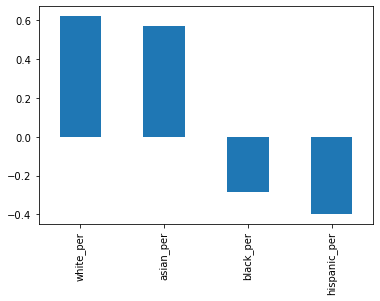

In [72]:
race_list = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

# Make a bar plot of the correlations between the columns above ('race_list') and sat_score:
correlations[race_list].plot.bar()
plt.show()

It looks like a higher percentage of white or asian students at a school correlates positively with SAT score, whereas a higher percentage of black or hispanic students correlates negatively with SAT score. this may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

#### Explore schools with low SAT scores and high values for `hispanic_per`

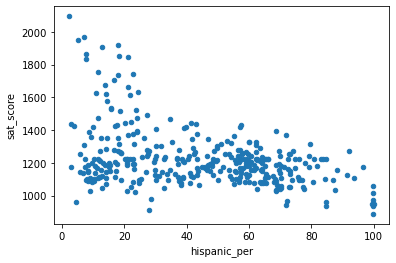

In [75]:
# make a scatter plot of 'hispanic_per' vs. 'sat_score':
combined.plot.scatter(x='hispanic_per', y='sat_score')
plt.show()

#### Research any schools with a `hispanic_per` greater than `95%`

In [80]:
# Find the school names in the data:
combined[combined['hispanic_per'] > 95][['SCHOOL NAME', 'sat_score']]

,SCHOOL NAME,sat_score
44,MANHATTAN BRIDGES HIGH SCHOOL,1058.0
82,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,1174.0
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,1014.0
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,951.0
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,934.0
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,970.0
253,MULTICULTURAL HIGH SCHOOL,887.0
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,951.0


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

#### Research any schools with a `hispanic_per` less than `10%` and an average SAT score greater than `1800`

In [83]:
# Find the school names in the data:
combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)][['SCHOOL NAME', 'sat_score']]

,SCHOOL NAME,sat_score
37,STUYVESANT HIGH SCHOOL,2096.0
151,BRONX HIGH SCHOOL OF SCIENCE,1969.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,1833.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,1868.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953.0


Many of the schools above appear to be specialised science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low `hispanic_per`, but it does explain why their students tend to do better on the SAT -- they are students from all over New York city who did well on a standardised test.

***

## Gender differences in SAT scores

There are two columns that indicate the percentage of each gender at a school:
- `male_per`
- `female_per`

We can plot out the correlations between each percentage and `sat_score`.

#### Investigate gender differences in SAT scores.

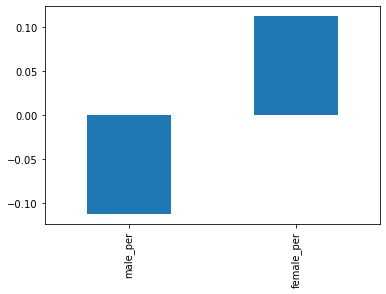

In [86]:
# Make a bar plot of the correlations between the columns above and sat_score:
correlations[['male_per', 'female_per']].plot.bar()
plt.show()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

#### Investigate schools with high SAT scores and a high `female_per`

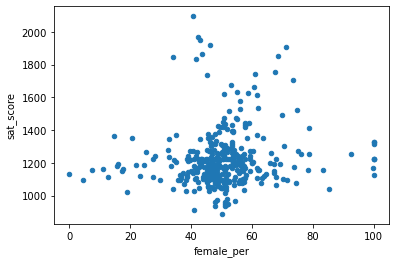

In [88]:
# make a scatter plot of 'female_per' vs. 'sat_score':
combined.plot.scatter(x='female_per', y='sat_score')
plt.show()

Based on the scatter plot, there does not seem  to be any real correlatio between `sat_score` and `female_per`. However, there is a cluster of schools with a high percentage of females (60 to 80%) and high SAT scores.

#### Research any schools with a `female_per` greater than `60%` and an average SAT score greater than `1700`.

In [89]:
# Find the school names in the data:
combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)][['SCHOOL NAME', 'sat_score']]

,SCHOOL NAME,sat_score
5,BARD HIGH SCHOOL EARLY COLLEGE,1856.0
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758.0
60,BEACON HIGH SCHOOL,1744.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707.0
302,TOWNSEND HARRIS HIGH SCHOOL,1910.0


These schools appear to be very selective liberal arts schools that have high academic standards.

***

## AP Exam Scores vs SAT Scores

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. Because `total_enrollment` is highly correlated with `sat_score`, we don't want to bias our results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

#### Calculate the percentage of students in each school that took an AP exam.

In [90]:
# Divide the 'AP Test Takers' column by the 'total_enrollment' column:
combined['ap_per'] = combined['AP Test Takers'] / combined['total_enrollment']

#### Investigate the relationship between AP scores and SAT scores

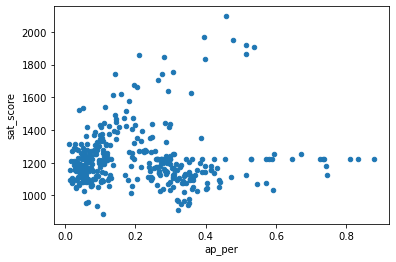

In [93]:
# Make a scatter plot of ap_per vs. sat_score:
combined.plot.scatter(x='ap_per', y='sat_score')
plt.show()

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.